In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_clipboard(sep = ',')

I have used the clipboard method of pandas as the [data](http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data) wasn't provided to download(.csv etc).

In [3]:
df.columns=['Age', 'Year of Operation', 'Number of axilliary nodes', 'Survival']

In [6]:
df.head()

,Age,Year of Operation,Number of axilliary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Description

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 
Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)             
         1 = the patient survived 5 years or longer              
         2 = the patient died within 5 year.

Dependent variable = 'Survival status'                                                                                  
Independent variables = 'Age', 'Patient's year of operation', 'Number of positive axilliary nodes detected'.


Let's change the values of Survival with
    '0' = the patient died within 5 year and 
    '1' = the patient survived 5 years or longer.

In [ ]:
df.replace({2:0}, inplace=True)

In [12]:
df.head(10)

,Age,Year of Operation,Number of axilliary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,0,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,0
7,34,66,9,0
8,34,58,30,1
9,34,60,1,1


In [10]:
df.describe()

,Age,Year of Operation,Number of axilliary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.904918,0.734426
std,10.744024,3.254078,7.253457,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                          305 non-null int64
Year of Operation            305 non-null int64
Number of axilliary nodes    305 non-null int64
Survival                     305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


## Assumptions

Let's make some assumptions about the data. These assumptions are purely based on out intution.

* The older the person receiving the opration, less likely will be his chances of survival(within 5 years).
* Advancements in technology with increase in the year of operation leading to high chances of survival.
* High number of axilliary nodes indicates the spread of cancer to other body parts so less chances of survival.

We will check the validity of these assumptions in the coming steps.

## Exploratory Data Analysis

* Effect of **'Age of patient at the time of operation'** on the survival.

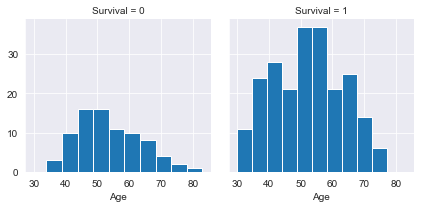

In [13]:
sns.set_style('darkgrid')# setting the style of seaborn plot

g = sns.FacetGrid(data=df, col='Survival')
g.map(plt.hist, 'Age')

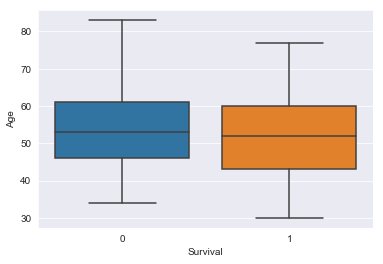

In [14]:
g = sns.boxplot(x='Survival', y='Age', data=df)

These two plots shows that:

* The persons receiving operation at 85 years of age or beyond did not survive similarly who recieves at below 35 years of age suvived.
* Most of the persons having breast cancer are between 40 to 70 years of age.

Remember we have assumed that our sample fairly approximate the population.

These results are in support of our 1st assumption but we are not sure how significant is the assumption.

* Effect of **'Year of Operation'** on Survival

In [55]:
# grouping the data in the column 'Year of Operation'

df['grp_YofOperation'] = pd.qcut(df['Year of Operation'], 4)

df_YofOperation = df.groupby(['grp_YofOperation', 'Survival']).count().unstack(1).sort_values(by=('Age', 1),ascending = False)['Age']

df_YofOperation.head()

Survival,0,1
grp_YofOperation,,
"(57.999, 60.0]",25,66
"(60.0, 63.0]",18,61
"(63.0, 66.0]",27,59
"(66.0, 69.0]",11,38


In [60]:
# replacing the groups with labels = [0,1,2,3] in order

df.loc[df['Year of Operation'] <= 60, 'Year of Operation'] = 0
df.loc[(df['Year of Operation'] > 60) & (df['Year of Operation'] <= 63) , 'Year of Operation'] = 1
df.loc[(df['Year of Operation'] > 63) & (df['Year of Operation'] <= 66) , 'Year of Operation'] = 2
df.loc[(df['Year of Operation'] > 66) & (df['Year of Operation'] <= 69) , 'Year of Operation'] = 3

df.drop('grp_YofOperation', axis=1, inplace=True)

df_YofOperation.index = [0,1,2,3]

# creating fraction of people survived
df_YofOperation['Fraction'] = df_YofOperation[1] / (df_YofOperation[0] + df_YofOperation[1])

df_YofOperation.columns = [0, 1, 'Fraction']
df_YofOperation.head()

Survival,0,1,Fraction
0,25,66,0.725275
1,18,61,0.772152
2,27,59,0.686047
3,11,38,0.775510


Text(0,0.5,'Fraction of people survived')

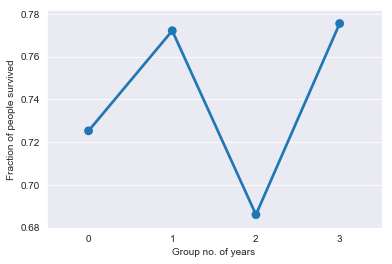

In [65]:
g = sns.pointplot(x = df_YofOperation.index, y = df_YofOperation['Fraction'])
plt.xlabel('Group of years of operation')
plt.ylabel('Fraction of people survived')

We conclude from this plot.

* As the year of operation increases there is no significant change in the survival status.

Thus not supporting our 2nd assumption.

* Effect of **'Number of axilliary nodes'** on survival

In [80]:
# grouping the data in the column 'Number of axilliary nodes'

df['grp_NumofAN'] = pd.qcut(df['Number of axilliary nodes'], 8, duplicates='drop')

df_NumofAn = df.groupby(['grp_NumofAN', 'Survival']).count().unstack(1).sort_values(by=('Age', 1),ascending = False)['Age']

df_NumofAn.head()

Survival,0,1
grp_NumofAN,,
"(-0.001, 1.0]",32,164
"(1.0, 4.0]",10,23
"(4.0, 11.0]",19,21
"(11.0, 52.0]",20,16


In [82]:
# replacing the groups with labels = [0,1,2,3] in order

df.loc[df['Number of axilliary nodes'] <= 1, 'Number of axilliary nodes'] = 0
df.loc[(df['Number of axilliary nodes'] > 1) & (df['Number of axilliary nodes'] <= 4) , 'Number of axilliary nodes'] = 1
df.loc[(df['Number of axilliary nodes'] > 4) & (df['Number of axilliary nodes'] <= 11) , 'Number of axilliary nodes'] = 2
df.loc[(df['Number of axilliary nodes'] > 11) & (df['Number of axilliary nodes'] <= 52) , 'Number of axilliary nodes'] = 3

df.drop('grp_NumofAN', axis=1, inplace=True)

df_NumofAn.index = [0,1,2,3]

# creating fraction of people survived
df_NumofAn['Fraction'] = df_NumofAn[1] / (df_NumofAn[0] + df_NumofAn[1])

df_NumofAn.columns = [0, 1, 'Fraction']
df_NumofAn.head()

,0,1,Fraction
0,32,164,0.836735
1,10,23,0.696970
2,19,21,0.525000
3,20,16,0.444444


Text(0,0.5,'Fraction of people survived')

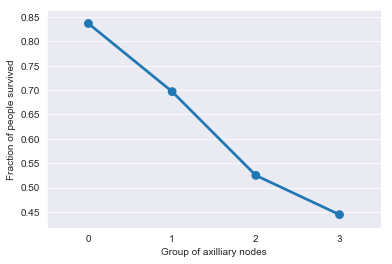

In [83]:
g = sns.pointplot(x = df_NumofAn.index, y = df_NumofAn['Fraction'])
plt.xlabel('Group of axilliary nodes')
plt.ylabel('Fraction of people survived')

This shows that:

* With the increase in axilliary nodes the chance of survival decrease

This supports our third assumption.

## Hypothesis Testing

Now we will conduct a test to see how significant is the result with our assumptions. As the dependent variable is 'nominal', we will use chi-square statistic(there are many test which we can conduct here but among the test that we have studied at udacity this will be our prefered choice). The test will be conducted for an alpha level of 0.05.

* Test between **'Age of patient at the time of operation'** and **'Survival'**

In [103]:
# Age is numerical
# convert age column in bands
df['age_bands'] = pd.qcut(df['Age'], 4)

df_Age = df.groupby(['age_bands', 'Survival']).count().unstack(1).sort_values(by=('Age', 1),ascending = False)['Age']

df.drop('age_bands', axis=1, inplace=True)

df_Age.index = [0,1,2,3]

# creating and calculating column and row total 
df_Age['Total'] = df_Age[0] + df_Age[1]
df_Age.loc['Total'] = df_Age.loc[0] + df_Age.loc[1] + df_Age.loc[2] + df_Age.loc[3]


df_Age.columns = [0,1,'Total']

df_Age.head()

,0,1,Total
0,16,63,79
1,23,59,82
2,23,53,76
3,19,49,68
Total,81,224,305


In [99]:
# storing the observed frequencies
f_obs = df_Age.iloc[:4,:2].values.flatten()

In [ ]:
# obtaining the expected frequencies
for i in [0,1,2,3]:
    for j in [0,1]:
        df_Age.loc[i,j] = (df_Age.loc[i,'Total']*df_Age.loc['Total', j])/df_Age.loc['Total', 'Total']

f_exp = df_Age.iloc[:4, :2].values.flatten()

df_Age.head()

In [119]:
# calculating the chi-square statistic



chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=2.305118261553086, pvalue=0.9410436958005226)

You can see the pvalue is 0.94 which is quite high for an alpha level of 0.05 so we failed to validate our 1st assumption.

* Test between **'Year of Operation'** and **Survival**.

In [121]:
df_YofOperation.head()

,0,1,Fraction
0,25,66,0.725275
1,18,61,0.772152
2,27,59,0.686047
3,11,38,0.775510


In [122]:
df_YofOperation.drop('Fraction', axis=1, inplace=True)

# creating and calculating column and row total 
df_YofOperation['Total'] = df_YofOperation[0] + df_YofOperation[1]
df_YofOperation.loc['Total'] = df_YofOperation.loc[0] + df_YofOperation.loc[1] + df_YofOperation.loc[2] + df_YofOperation.loc[3]

df_YofOperation.head()

,0,1,Total
0,25,66,91
1,18,61,79
2,27,59,86
3,11,38,49
Total,81,224,305


In [123]:
# storing the observed frequencies
f_obs = df_YofOperation.iloc[:4,:2].values.flatten()

In [124]:
# obtaining the expected frequencies
for i in [0,1,2,3]:
    for j in [0,1]:
        df_YofOperation.loc[i,j] = (df_YofOperation.loc[i,'Total']*df_YofOperation.loc['Total', j])/df_YofOperation.loc['Total', 'Total']

f_exp = df_YofOperation.iloc[:4, :2].values.flatten()

df_YofOperation.head()

,0,1,Total
0,24.167213,66.832787,91
1,20.980328,58.019672,79
2,22.839344,63.160656,86
3,13.013115,35.986885,49
Total,81.000000,224.000000,305


In [125]:
# calculating the chi-square statistic



chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=2.071601853112218, pvalue=0.955771197224563)

Again the pvalue 0.955 is high for an alpha level 0.05 so we failed to validate our 2nd assumption.

* Test between **'Number of axilliary nodes'** and **'Survival'**.

In [126]:
df_NumofAn.head()

,0,1,Fraction
0,32,164,0.836735
1,10,23,0.696970
2,19,21,0.525000
3,20,16,0.444444


In [127]:
df_NumofAn.drop('Fraction', axis=1, inplace=True)

# creating and calculating column and row total 
df_NumofAn['Total'] = df_NumofAn[0] + df_NumofAn[1]
df_NumofAn.loc['Total'] = df_NumofAn.loc[0] + df_NumofAn.loc[1] + df_NumofAn.loc[2] + df_NumofAn.loc[3]

df_NumofAn.head()

,0,1,Total
0,32,164,196
1,10,23,33
2,19,21,40
3,20,16,36
Total,81,224,305


In [128]:
# storing the observed frequencies
f_obs = df_NumofAn.iloc[:4,:2].values.flatten()

In [129]:
# obtaining the expected frequencies
for i in [0,1,2,3]:
    for j in [0,1]:
        df_NumofAn.loc[i,j] = (df_NumofAn.loc[i,'Total']*df_NumofAn.loc['Total', j])/df_NumofAn.loc['Total', 'Total']

f_exp = df_NumofAn.iloc[:4, :2].values.flatten()

df_NumofAn.head()

,0,1,Total
0,52.052459,143.947541,196
1,8.763934,24.236066,33
2,10.622951,29.377049,40
3,9.560656,26.439344,36
Total,81.000000,224.000000,305


In [130]:
# calculating the chi-square statistic

chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=35.27110002041207, pvalue=9.945721287773152e-06)

At last we get the value p < 0.001 which validates our 3rd assumption means, high number of axilliary leads to less chances of survival.

Now we will calculate crammer's V to measure the strength of this assumption.

![equation](http://mvpprograms.com/help/images/CramersVCalc.jpg)


Where:-
N: number of observations
r: number of rows
c: number of columns

In [133]:
chi_stats = 35.27

# crammer's V
V = np.sqrt(chi_stats/(305*(2-1)))
V

0.34005785428702434

![table](http://www.parvez-ahammad.org/uploads/7/6/2/6/76266695/screen-shot-2016-10-11-at-3-52-24-pm.png)



Our degree of freedom is 3 so from the table we can conclude that there is strong relationship between 'Number of axilliary nodes' and 'Survival'.